<b> Check algorithm for negativity/three-pi comparing results of "Monogamy Inequality in terms of Negativity for Three-Qubit States"


In [4]:
from qutip import *
import pylab as py
import numpy as np
import matplotlib.pyplot as plt



def heaviside(x):
    if x >= 0 :
        return 1
    if x < 0 :
        return 0
    
def nega(rho, subsys):
    
    #create mask which counts the number of possible subsystems
    x = [0 for i in rho.dims[0]]
   
    #assigns a 1 in the position of the subsystem for which we want to compute the negativity
    x[subsys] = 1
        
    #takes partial transpose with respect to subsys x
    rho_pt = partial_transpose(rho, x)
    
    #finds eivenvalues of pt matrix
    eig = rho_pt.eigenenergies()
    
    #finds abs value of the eigenvalues
    abs_eig = abs(eig)
    
    negat = 0 #initialize value of negativity
    
    #takes the difference 
    diff = (abs_eig - eig)
    
    
    #computes negativity
    for el in diff:
        negat += el

    
    return negat


def three_pi(rho):
    
    #determine pi_a
    N_a_b = nega(rho.ptrace([1,2]),0)
    
    N_a_c = nega(rho.ptrace([1,3]),0)
    
    N_a_bc = nega(rho.ptrace([1,2,3]), 0)
    
    pi_a = max(0,(N_a_bc)**2 - (N_a_b)**2 - (N_a_c)**2)
    
    
    #determine pi_b
    N_b_a = nega(rho.ptrace([1,2]),1)
    
    N_b_c = nega(rho.ptrace([1,3]),0)
    
    N_b_ac = nega(rho.ptrace([1,2,3]), 1)
    
    pi_b = max(0,(N_b_ac)**2 - (N_b_a)**2 - (N_b_c)**2)
    
    #determine pi_c
    N_c_a = nega(rho.ptrace([1,3]),1)
    
    N_c_b = nega(rho.ptrace([2,3]),0)
    
    N_c_ab = nega(rho.ptrace([1,2,3]), 2)
    
    pi_c = max(0,(N_c_ab)**2 - (N_c_a)**2 - (N_c_b)**2)
    
    return (pi_a + pi_b + pi_c)/3

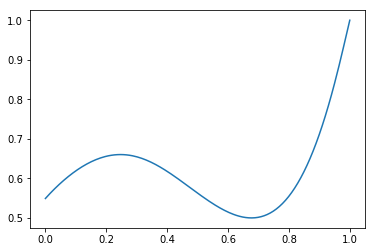

In [5]:


pi = 0
pf = 1
p_steps = 200
p_list = np.linspace(pi,pf,p_steps) # vector of time steps

pi = np.zeros(p_steps)

cont = 0

#ghz - w state
for p in p_list:

    psi0 =  np.sqrt(p)*((tensor(basis(2,0), basis(2,0), basis(2,0))) - ( tensor(basis(2,1), basis(2,1), basis(2,1)) ) ) + np.sqrt(1-p)*( (tensor(basis(2,1), basis(2,0), basis(2,0))) + ( tensor(basis(2,0), basis(2,1), basis(2,0)) ) + ( tensor(basis(2,0), basis(2,0), basis(2,1)) ) ) 
    psi = psi0.unit()


    #density matrix
    rho = ket2dm(psi)


    #determine pi_a
    N_a_b = nega(rho.ptrace([0,1]),0)

    N_a_c = nega(rho.ptrace([0,2]),0)

    N_a_bc = nega(rho.ptrace([0,1,2]), 0)

    pi_a = max(0,(N_a_bc)**2 - (N_a_b)**2 - (N_a_c)**2)


    #determine pi_b
    N_b_a = nega(rho.ptrace([0,1]),1)

    N_b_c = nega(rho.ptrace([0,2]),0)

    N_b_ac = nega(rho.ptrace([0,1,2]), 1)

    pi_b = max(0,(N_b_ac)**2 - (N_b_a)**2 - (N_b_c)**2)

    #determine pi_c
    N_c_a = nega(rho.ptrace([0,2]),1)

    N_c_b = nega(rho.ptrace([1,2]),0)

    N_c_ab = nega(rho.ptrace([0,1,2]), 2)

    pi_c = max(0,(N_c_ab)**2 - (N_c_a)**2 - (N_c_b)**2)

    pi[cont] = (pi_a + pi_b + pi_c)/3
    
    cont += 1

plt.plot(p_list, pi)
plt.show()
